In [11]:
import praw

In [12]:
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="daHP9WVrhYw8D16nmuikUA",
    client_secret="Hs8nBAwefoQYNOiMH8RJzxShxNT70A",
    user_agent=user_agent
)

In [13]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [14]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("hydroelectric").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Hydro on artesian well
1c5k2j5
Zealousideal-Donut-6
1713284014.0
1
1.0
https://www.reddit.com/r/HydroElectric/comments/1c5k2j5/hydro_on_artesian_well/
0


In [29]:
headlines = set()
for submission in reddit.subreddit("hydroelectric").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

135


In [43]:
#Create a dataframe from the scrapped data 
hydroelectric_df = pd.DataFrame(headlines)
bitcoin_df.head()

,Titles,Subjectivity,Polarity,Insight
0,Shift in engineering interest - Civil/Environm...,0.00,0.00,Neutral
1,Nedre Røssåga hydropower plant – ready for ano...,0.50,0.20,Positive
2,Bitcoin and Cryptocurrency Mining W/ Hydro Ele...,0.00,0.00,Neutral
3,hydro electric plumbing question I would reall...,0.35,0.35,Positive
4,Need Advice,0.00,0.00,Neutral


In [48]:
hydroelectric_df.head()

,0
0,Shift in engineering interest - Civil/Environm...
1,Nedre Røssåga hydropower plant – ready for ano...
2,Bitcoin and Cryptocurrency Mining W/ Hydro Ele...
3,hydro electric plumbing question: I would real...
4,Need Advice


In [51]:
hydroelectric_df.columns

RangeIndex(start=0, stop=1, step=1)

In [53]:
hydroelectric_df.columns = ['Titles']

In [63]:
hydroelectric_df.head()

,Titles
0,Shift in engineering interest - Civil/Environm...
1,Nedre Røssåga hydropower plant – ready for ano...
2,Bitcoin and Cryptocurrency Mining W/ Hydro Ele...
3,hydro electric plumbing question: I would real...
4,Need Advice


In [72]:
hydroelectric_df.Titles.duplicated().sum() 

0

In [80]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
hydroelectric_df["Titles"]= hydroelectric_df["Titles"].apply(cleanTxt)

#Show the clean text
hydroelectric_df.head()

,Titles
0,Shift in engineering interest - Civil/Environm...
1,Nedre Røssåga hydropower plant – ready for ano...
2,Bitcoin and Cryptocurrency Mining W/ Hydro Ele...
3,hydro electric plumbing question I would reall...
4,Need Advice


In [87]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
hydroelectric_df["Titles"]= hydroelectric_df["Titles"].apply(remove_emoji)

#Show the clean text
hydroelectric_df.head()

,Titles
0,Shift in engineering interest - Civil/Environm...
1,Nedre Røssåga hydropower plant – ready for ano...
2,Bitcoin and Cryptocurrency Mining W/ Hydro Ele...
3,hydro electric plumbing question I would reall...
4,Need Advice


In [88]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [89]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity



In [90]:
#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


In [93]:

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
hydroelectric_df['Subjectivity'] = hydroelectric_df['Titles'].apply(getSubjectivity)
hydroelectric_df['Polarity'] = hydroelectric_df['Titles'].apply(getPolarity)

#Now display data
hydroelectric_df.head()

,Titles,Subjectivity,Polarity
0,Shift in engineering interest - Civil/Environm...,0.00,0.00
1,Nedre Røssåga hydropower plant – ready for ano...,0.50,0.20
2,Bitcoin and Cryptocurrency Mining W/ Hydro Ele...,0.00,0.00
3,hydro electric plumbing question I would reall...,0.35,0.35
4,Need Advice,0.00,0.00


In [95]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
hydroelectric_df["Insight"] = hydroelectric_df["Polarity"].apply(getInsight)

hydroelectric_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Shift in engineering interest - Civil/Environm...,0.000000,0.000000,Neutral
1,Nedre Røssåga hydropower plant – ready for ano...,0.500000,0.200000,Positive
2,Bitcoin and Cryptocurrency Mining W/ Hydro Ele...,0.000000,0.000000,Neutral
3,hydro electric plumbing question I would reall...,0.350000,0.350000,Positive
4,Need Advice,0.000000,0.000000,Neutral
5,Switching between powering the grid and poweri...,0.214286,-0.071429,Negative
6,Nanohydro system using weed eater motor and du...,0.000000,0.000000,Neutral
7,Will Three Gorges Dam cause a nuclear disaster...,0.000000,0.000000,Neutral
8,"Created a LEGO Hydroelectric Power Plant, hope...",0.220000,0.175000,Positive
9,Anyone here sell power back to the grid?,0.000000,0.000000,Neutral


Data Visualization

In [96]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

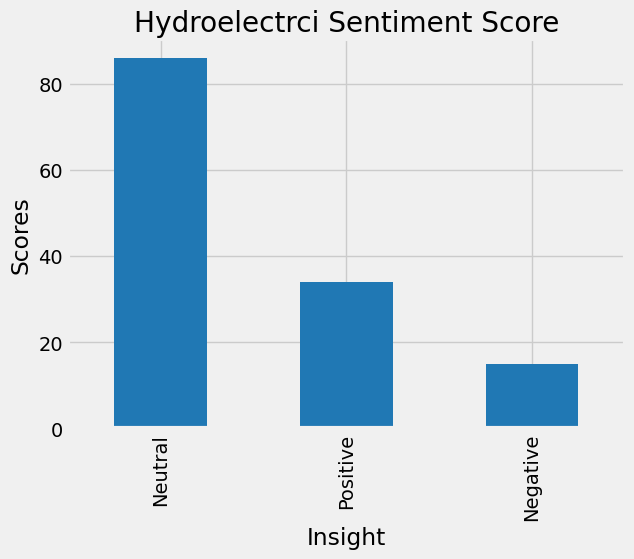

In [97]:
#Plot the values count of sentiment
plt.title("Hydroelectrci Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

Wordcloud

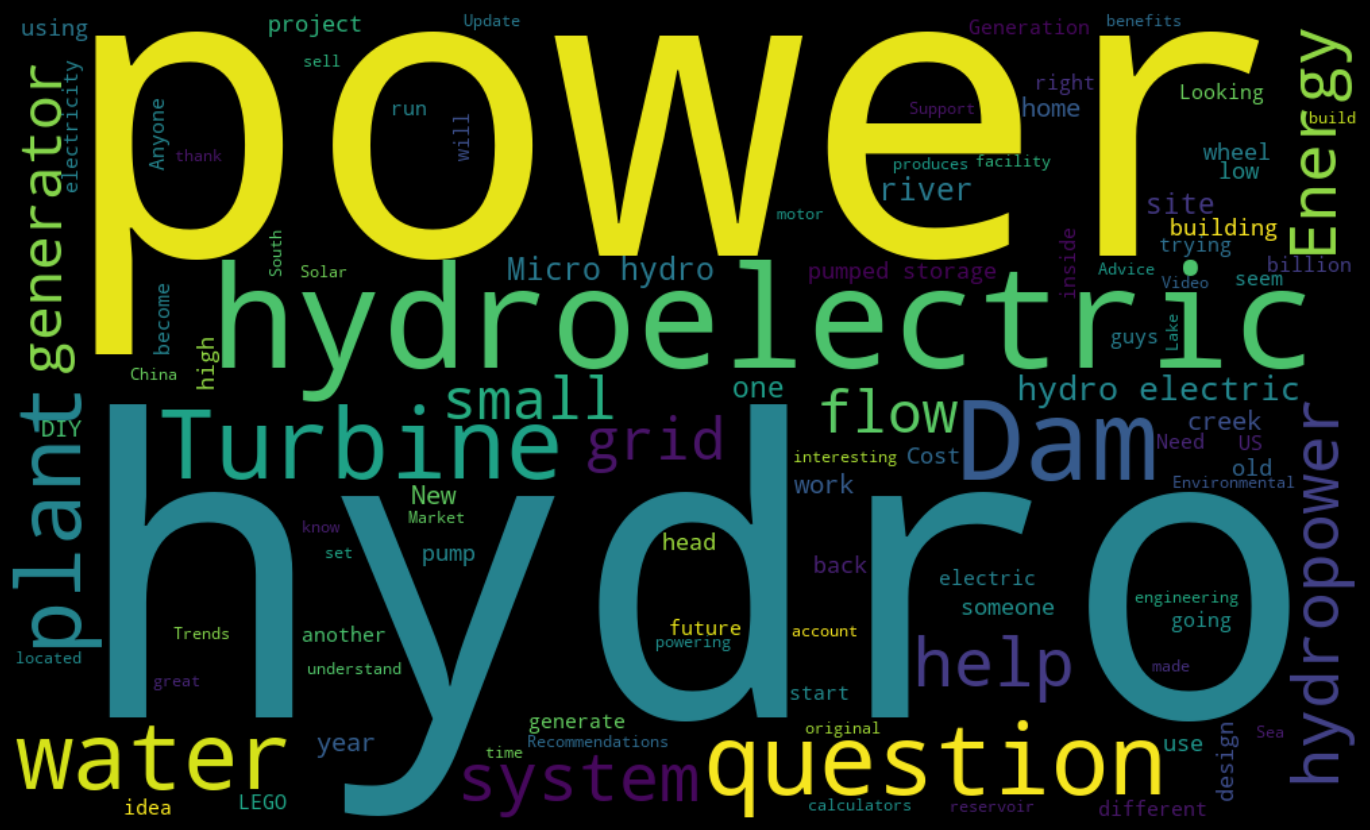

In [98]:
text = ' '.join( [twts for twts in hydroelectric_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");